# Q1. Train a **single perceptron and SVM** to learn an AND gate with two inputs x1 and x2. Assume that all the weights of the perceptron are initialized as 0. Show the calulation for each step and also draw the decision boundary for each updation.

### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt import matrix, solvers

## Single Perceptron

### Defining the necessary functions used

In [ ]:
def decision_plot(w, x_min, x_max, y_min, y_max):
    inp_0 = []
    inp_1 = []

    x_min = x_min - np.abs(((x_max - x_min) / 10))
    y_min = y_min - np.abs(((y_max - y_min) / 10))

    x_max = x_max + np.abs(((x_max - x_min) / 10))
    y_max = y_max + np.abs(((y_max - y_min) / 10))

    for i in np.arange(x_min, x_max, np.abs(x_max - x_min) / 100):
        for j in np.arange(y_min, y_max, np.abs(x_max - x_min) / 100):
            y_pred = np.dot(np.array([[1, i, j]]), w)
            
            if y_pred < 0:
                inp_0.append(np.array((i, j)))
            
            else:
                inp_1.append(np.array((i, j)))

    return inp_0, inp_1

In [ ]:
def perceptron_training_alg(X, Y, learning_rate):
  # Adding Bias to the input and Randomly initializing weights
  num_samples, num_features = X.shape
  
  X = np.hstack((np.ones((num_samples, 1)), X))
  W = np.zeros(num_features + 1).reshape((-1, 1))

  weight_vector = []
  weight_vector.append(W)

  print(W, "\n")
  
  # Running the algorithm until all the data points are correctly classified
  samples_misclassified = True
  cnt=0
  while samples_misclassified and cnt < 100000:
    # Initially we'll assume that there are no misclassified samples
    samples_misclassified = False
    
    for index, x in enumerate(X):
      if cnt >= 100000:
        return W, np.array(weight_vector)
      
      x = Y[index] * x
      
      if np.dot(x.reshape((1, -1)), W) <= 0: # if samples misclassified
        samples_misclassified = True
        W = W + (learning_rate * x.reshape((-1,1)))     # Gradient Descent Step
        weight_vector.append(W)

        print(W, "\n")
        cnt += 1
  
  return W, np.array(weight_vector)

In [ ]:
def sorter(X, Y):
  X_new0 = []
  Y_new0 = []
  
  X_new1 = []
  Y_new1 = []
  
  for x, y in zip(X, Y):
    if y == 0:
      Y_new0.append(y)
      X_new0.append(x)
    
    else:
      Y_new1.append(y)
      X_new1.append(x)
  
  X0 = []
  Y0 = []
  
  X1 = []
  Y1 = []

  if len(X_new0) > 0:
    X0 = np.stack(X_new0)
    Y0 = np.stack(Y_new0)
  
  elif len(X_new1) > 0:
    X1 = np.stack(X_new1)
    Y1 = np.stack(Y_new1)
  
  if len(X0) > 0 and len(X1) > 0:
    X = np.concatenate((X0, X1))
    Y = np.concatenate((Y0, Y1))
  
  elif len(X0) > 0:
    X = X0
    Y = Y0
  
  else:
    X = X1
    Y = Y1
  
  return X, Y

In [ ]:
def decision_boundary(W, X, Y):
  X, Y = sorter(X, Y)
  num_samples, num_features = X.shape
  np2 = np.hstack((np.ones((num_samples, 1)), X))
  
  X=np2
  
  x1, y1 = decision_plot(W, min(X[:,1]), max(X[:,1]), min(X[:,2]), max(X[:,2]))
  
  plt.scatter([i[0] for i in x1], [i[1] for i in x1])
  plt.scatter([i[0] for i in y1], [i[1] for i in y1])
  plt.scatter(X[:np.argmax(Y), 1], X[:np.argmax(Y), 2])
  plt.scatter(X[np.argmax(Y):, 1], X[np.argmax(Y):, 2])
  plt.show()

### Code

In [ ]:
X = np.array([[1, 1], [0, 1], [1, 0], [0, 0]])
Y = np.array([[1], [-1], [-1], [-1]])
ans = np.array([[1], [0], [0], [0]])

len(X)

4

In [ ]:
W, weight_vector = perceptron_training_alg(X, Y, 0.5)

[[0.]
 [0.]
 [0.]] 

[[0.5]
 [0.5]
 [0.5]] 

[[0. ]
 [0.5]
 [0. ]] 

[[-0.5]
 [ 0. ]
 [ 0. ]] 

[[0. ]
 [0.5]
 [0.5]] 

[[-0.5]
 [ 0.5]
 [ 0. ]] 

[[-1.]
 [ 0.]
 [ 0.]] 

[[-0.5]
 [ 0.5]
 [ 0.5]] 

[[-1. ]
 [ 0.5]
 [ 0. ]] 

[[-0.5]
 [ 1. ]
 [ 0.5]] 

[[-1.]
 [ 1.]
 [ 0.]] 

[[-1.5]
 [ 0.5]
 [ 0. ]] 

[[-1. ]
 [ 1. ]
 [ 0.5]] 

[[-1.5]
 [ 0.5]
 [ 0.5]] 

[[-1.]
 [ 1.]
 [ 1.]] 

[[-1.5]
 [ 1. ]
 [ 0.5]] 

[[-1. ]
 [ 1.5]
 [ 1. ]] 

[[-1.5]
 [ 1.5]
 [ 0.5]] 

[[-2. ]
 [ 1. ]
 [ 0.5]] 

[[-1.5]
 [ 1.5]
 [ 1. ]] 

[[-2.]
 [ 1.]
 [ 1.]] 

[[-1.5]
 [ 1.5]
 [ 1.5]] 

[[-2. ]
 [ 1.5]
 [ 1. ]] 



In [ ]:
W

array([[-2. ],
       [ 1.5],
       [ 1. ]])

In [ ]:
weight_vector

array([[[ 0. ],
        [ 0. ],
        [ 0. ]],

       [[ 0.5],
        [ 0.5],
        [ 0.5]],

       [[ 0. ],
        [ 0.5],
        [ 0. ]],

       [[-0.5],
        [ 0. ],
        [ 0. ]],

       [[ 0. ],
        [ 0.5],
        [ 0.5]],

       [[-0.5],
        [ 0.5],
        [ 0. ]],

       [[-1. ],
        [ 0. ],
        [ 0. ]],

       [[-0.5],
        [ 0.5],
        [ 0.5]],

       [[-1. ],
        [ 0.5],
        [ 0. ]],

       [[-0.5],
        [ 1. ],
        [ 0.5]],

       [[-1. ],
        [ 1. ],
        [ 0. ]],

       [[-1.5],
        [ 0.5],
        [ 0. ]],

       [[-1. ],
        [ 1. ],
        [ 0.5]],

       [[-1.5],
        [ 0.5],
        [ 0.5]],

       [[-1. ],
        [ 1. ],
        [ 1. ]],

       [[-1.5],
        [ 1. ],
        [ 0.5]],

       [[-1. ],
        [ 1.5],
        [ 1. ]],

       [[-1.5],
        [ 1.5],
        [ 0.5]],

       [[-2. ],
        [ 1. ],
        [ 0.5]],

       [[-1.5],
        [ 1.5],
        [ 1. ]],



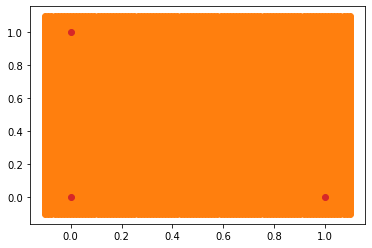

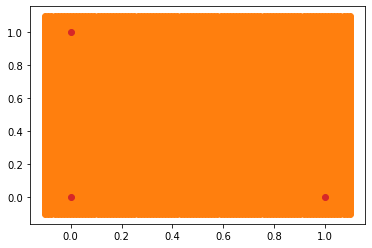

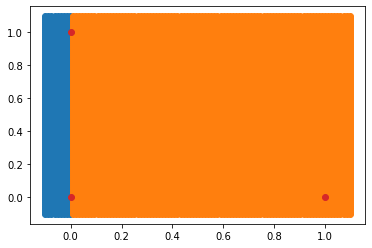

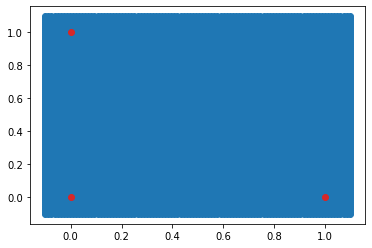

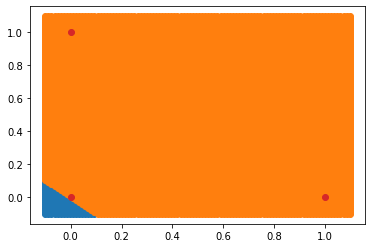

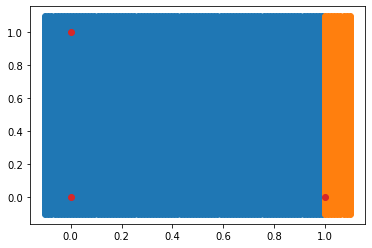

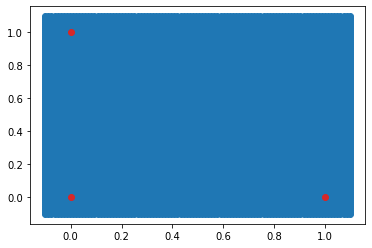

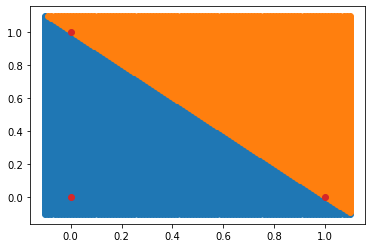

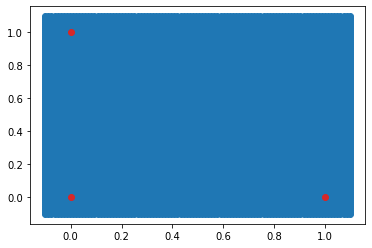

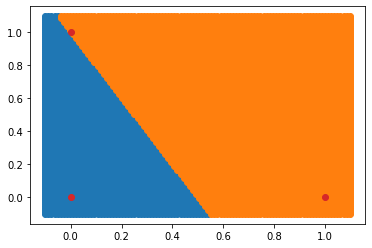

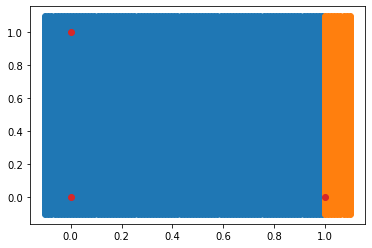

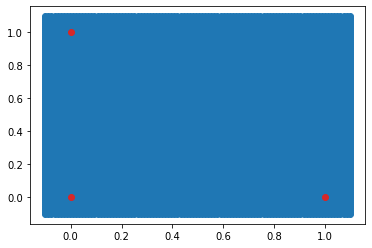

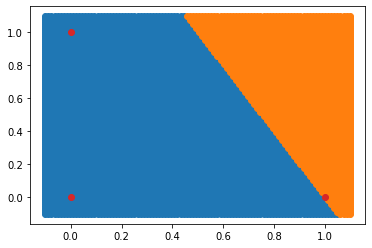

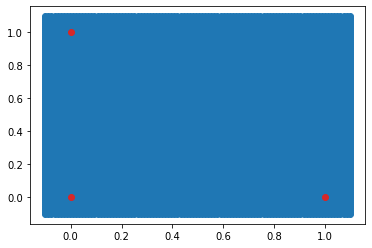

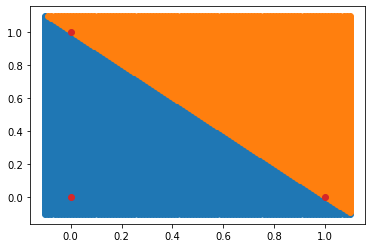

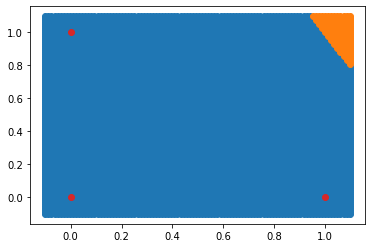

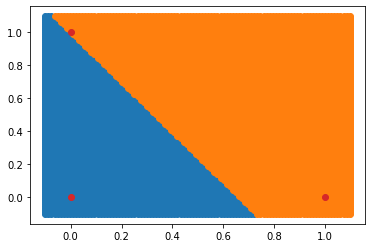

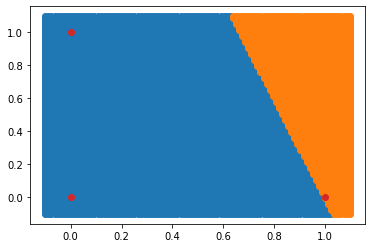

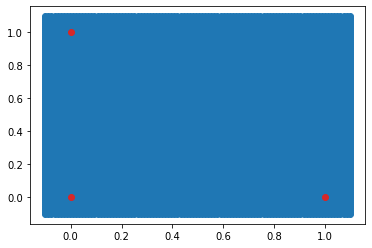

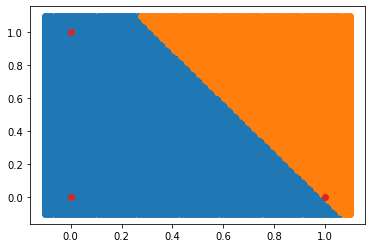

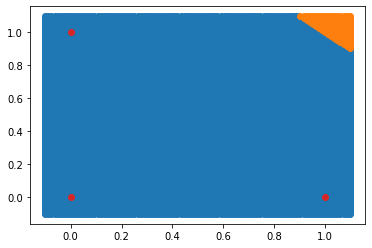

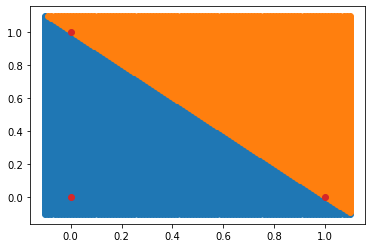

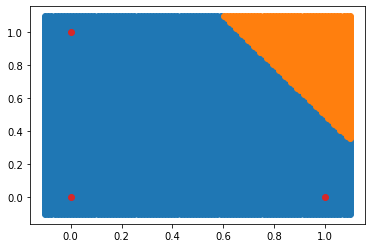

In [ ]:
for w in weight_vector:
  decision_boundary(w, X, ans)

## SVM

### Defining the necessary functions used

In [ ]:
def SVM(C1, C2):
  x1 = np.array(C1.to_numpy())
  x2 = np.array(C2.to_numpy())

  x = np.vstack((x1, x2))
  y = np.hstack((np.ones(len(x1)), np.ones(len(x2)) * -1))
  
  X = np.dot(x, np.transpose(x))
  Y = np.outer(y, y)

  n = X.shape[0]

  H = matrix(Y * X)
  f = matrix(np.ones(n) * -1)
  A = matrix(np.diag(np.ones(n) * -1))
  a = matrix(np.zeros(n))
  B = matrix(y, (1, n))  
  b = matrix(0.0)
  
  # solve QP problem
  solution = solvers.qp(H, f, A, a, B, b)
  print('')

  # Lagrange multipliers
  t1 = np.ravel(solution['x'])
  
  # Support vectors have non zero lagrange multipliers
  for i in range(0, len(t1)):
    if(t1[i] < 1e-4):
      t1[i] = 0.0
    else:
      t1[i] = round(t1[i], 4)
  
  t1 = np.array(t1)
  print(t1)

  # Weight vector
  w = np.zeros(X.shape[1])
  for i in range(X.shape[1]):
    w[i] = t1[i] * y[i]
  
  w = np.dot(w, x)
  
  # Intercept
  b = 0
  for i in range(len(t1)):
    if(t1[i] != 0.0):
      b = round(1 - np.dot(w, np.transpose(x[i])), 4)
      break
  
  return w, b

### Code

In [ ]:
X = [[0, 0], [0, 1], [1, 0]]

C1 = pd.DataFrame(X)
C1

,0,1
0,0,0
1,0,1
2,1,0


In [ ]:
X = [[1, 1]]

C2 = pd.DataFrame(X)
C2

,0,1
0,1,1


In [ ]:
w, b = SVM(C1, C2)


print(w)
print('')
print(b)

     pcost       dcost       gap    pres   dres
 0: -1.7500e+00 -4.2500e+00  8e+00  2e+00  2e+00
 1: -3.6653e+00 -4.3941e+00  1e+00  3e-01  3e-01
 2: -3.9945e+00 -4.0256e+00  3e-02  2e-15  3e-16
 3: -3.9999e+00 -4.0003e+00  3e-04  1e-15  4e-16
 4: -4.0000e+00 -4.0000e+00  3e-06  2e-15  4e-16
Optimal solution found.

[0. 2. 2. 4.]
[-2. -2.]

3.0


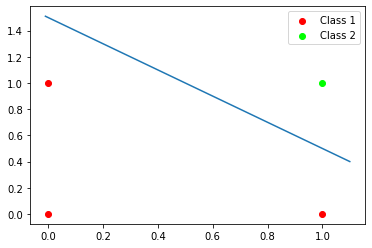

In [ ]:
x1 = np.arange(-0.01, 1.1, 0.01)

plt.scatter(C1.iloc[:, [0]], C1.iloc[:, [1]], label = 'Class 1', color = '#FF0000')
plt.scatter(C2.iloc[:, [0]], C2.iloc[:, [1]], label = 'Class 2', color = '#00FF00')
plt.legend()
  
slope, c = -w[0] / w[1], -b / w[1]
plt.plot(x1, slope * x1 + c)
plt.show()